In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from lightgbm import LGBMClassifier
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import StratifiedKFold,KFold
# Restrict minor warnings
import warnings
from catboost import CatBoostClassifier, Pool
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [5]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [6]:
cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [7]:
from sklearn.preprocessing import LabelEncoder
for i in cols:
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i].astype('str'))
    le = LabelEncoder()
    test[i] = le.fit_transform(test[i].astype('str'))

In [8]:
train.dtypes

id                        int64
Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [9]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [10]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297


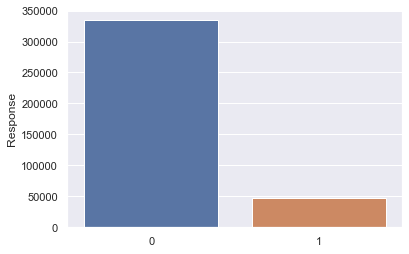

In [11]:
x=train['Response'].value_counts()
sns.barplot(x.index,x)

In [12]:
cat_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Previously_Insured', 'Driving_License']

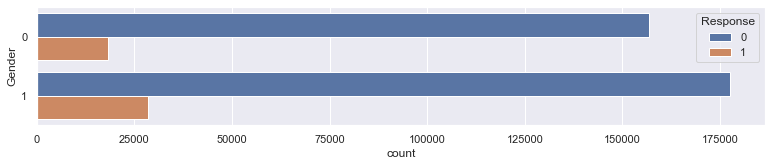

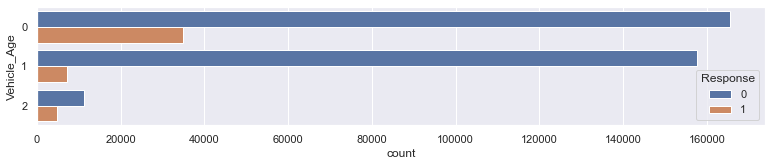

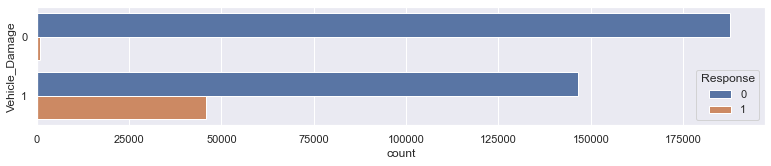

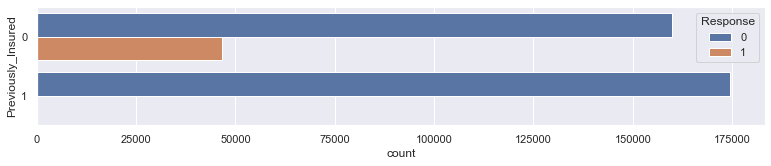

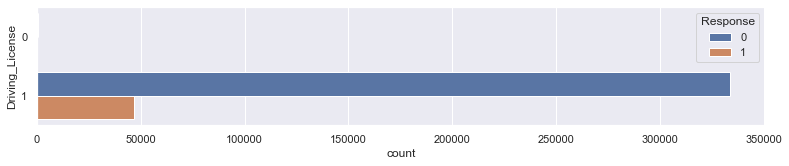

In [13]:
i = 1
for column in cat_cols:
    plt.figure(figsize = (60, 10))
    plt.subplot(4, 4, i)
    #x = train['Gender'].value_counts()
    sns.countplot(y=train[column], hue =train['Response'])
#(x.index,train['Response'].value_counts())
    #plt.xlim(10,1000) 
    i += 1
#plt.show()

### Lets do some more analysis on these 3 columns below.

In [14]:
cat_cols1 = ['Vehicle_Damage', 'Previously_Insured', 'Driving_License']

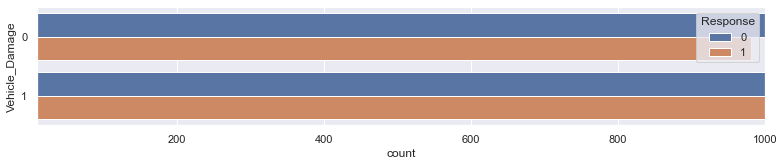

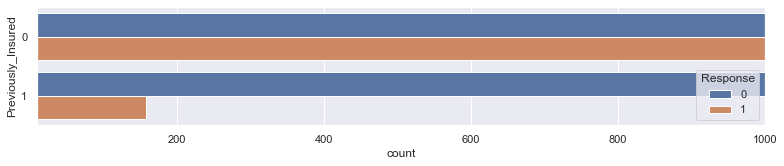

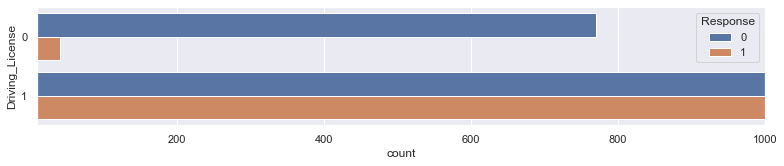

In [15]:
i = 1
for column in cat_cols1:
    plt.figure(figsize = (60, 10))
    plt.subplot(4, 4, i)
    #x = train['Gender'].value_counts()
    sns.countplot(y=train[column], hue =train['Response'])
#(x.index,train['Response'].value_counts())
    plt.xlim(10,1000) 
    i += 1
#plt.show()

The above plot shows that:  
*only a limited number of people without driving licence are also opting for vehicle incurance.  
*only a limited number of people who have previously insured the vehicle are opting for vehicle insurance.  
*only a limited number of people who dont have vehicle damage are opting for the vehicle insurance.  

In [16]:
num_cols = ['Age', 'Region_Code', 'Policy_Sales_Channel', 'Vintage']

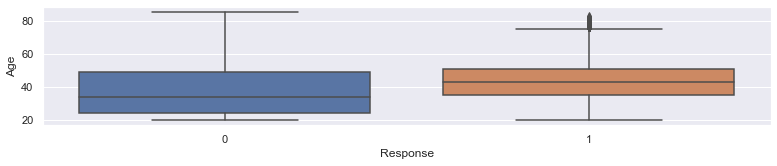

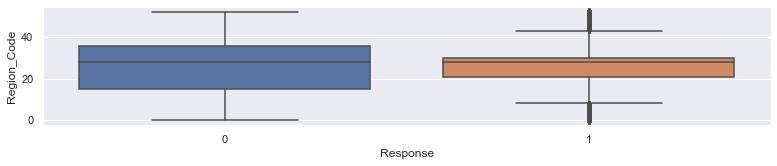

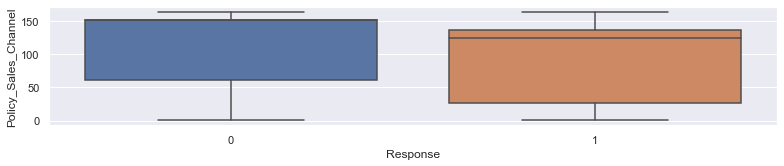

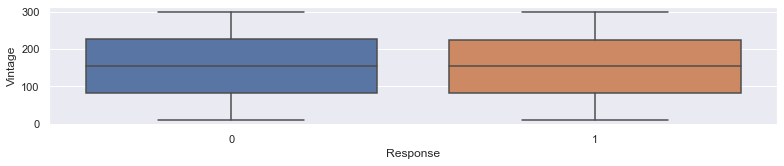

In [17]:
i = 1
for column in num_cols:
    plt.figure(figsize = (60, 10))
    plt.subplot(4, 4, i)
    sns.boxplot(x = train['Response'], y =train[column] )
    i += 1
    plt.show()

In [18]:
np.amin(train['Annual_Premium'].unique())


2630.0

In [19]:
train.shape[1]

12

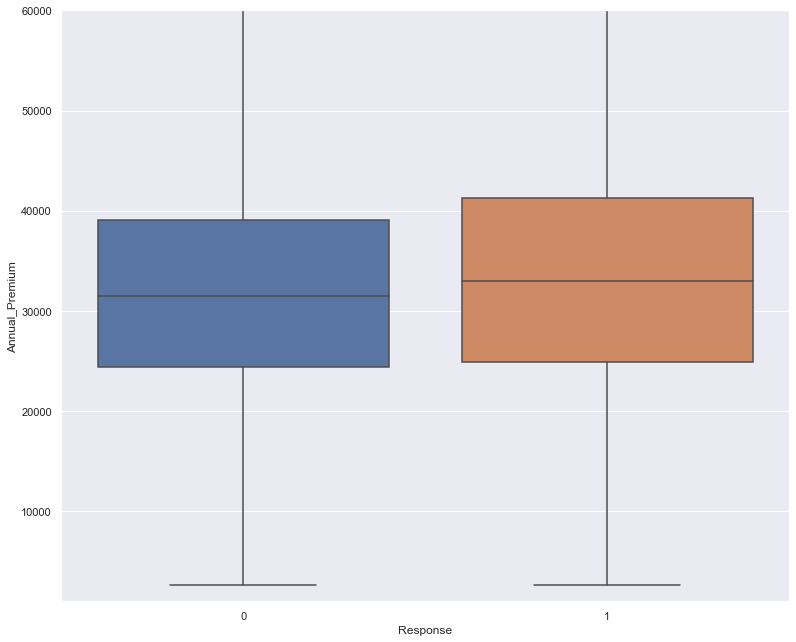

In [20]:
plt.figure(figsize = (60, 50))
plt.subplot(4, 4, i)
sns.boxplot(x = train['Response'], y =train['Annual_Premium'] )
plt.ylim(1000,60000)   
plt.show()

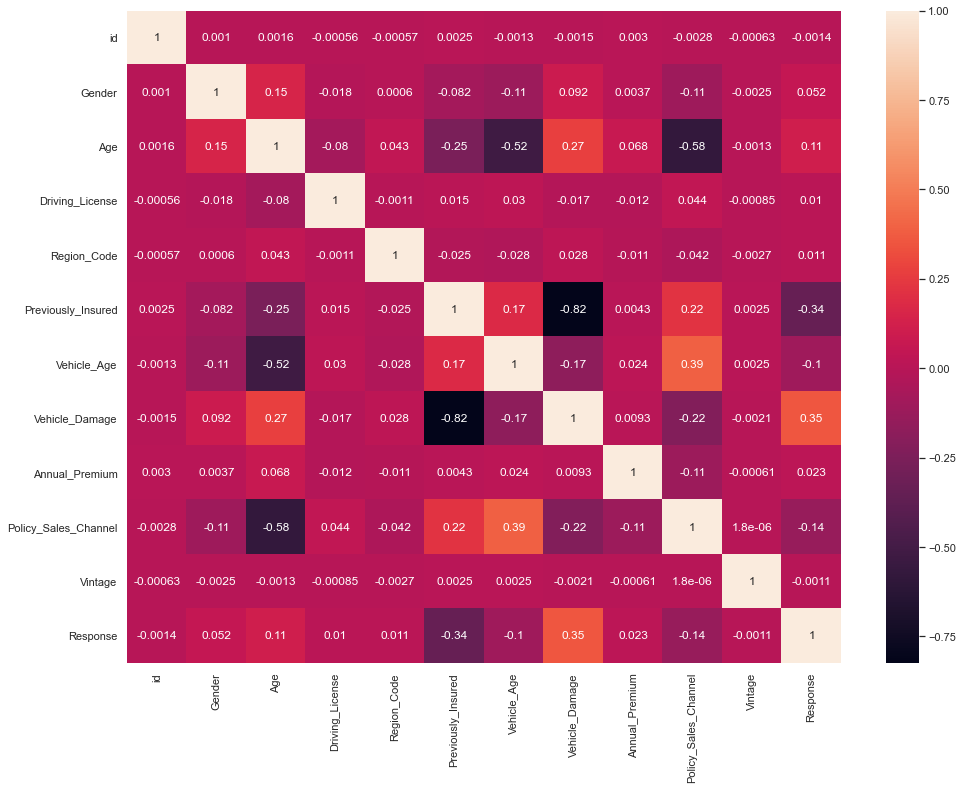

In [21]:
plt.subplots(figsize=(16,12))
sns.heatmap(train.corr(), annot =True)

In [22]:
# Mention Categorical Values for catboost Model to Handle :
#categorical_features = cols
cat_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Previously_Insured', 'Driving_License', 'Policy_Sales_Channel', 'Region_Code']
for cols in cat_cols:
    train[cols] = train[cols].astype(int)
    test[cols] = test[cols].astype(int)
train.dtypes
    #test[i] = test[i].astype(str)

id                        int64
Gender                    int32
Age                       int64
Driving_License           int32
Region_Code               int32
Previously_Insured        int32
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel      int32
Vintage                   int64
Response                  int64
dtype: object

In [23]:
train_x = train.drop(['Response', 'id'], axis =1)
test_x = test.drop(['id'], axis =1)
train_y = train['Response']

In [24]:
train.dtypes

id                        int64
Gender                    int32
Age                       int64
Driving_License           int32
Region_Code               int32
Previously_Insured        int32
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel      int32
Vintage                   int64
Response                  int64
dtype: object

In [25]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### For handling class imbalance, catbooster uses a parameter scale_pos_weight = negativeclass/positive class.

In [26]:
test_x.dtypes

Gender                    int32
Age                       int64
Driving_License           int32
Region_Code               int32
Previously_Insured        int32
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel      int32
Vintage                   int64
dtype: object

In [44]:
#Best Score previous 85.87
#Trials
X_data, x_test_data, y_data, y_test_data = train_test_split(train_x, train_y, test_size = 0.25, 
                                                           shuffle = True, stratify =train_y,  random_state= 150)

model_shrinked = CatBoostClassifier(
        depth=6,
        n_estimators = 3000,
        #value of l2_leaf_reg makes the graph with less AUC
        #max_depth = int(best['max_depth']),
        #l2_leaf_reg = int(best['l2_leaf_reg']),,
        #bagging_temperature = 10,
        random_seed=14356,
        task_type="CPU",
        #grow_policy = 'Lossguide',
        #random_state=2,
        #border_count = 32,
       loss_function = 'Logloss',
        #---To reduce overfitting, eval_metric = 'Accuracy' and use_best_model =True
        eval_metric = 'AUC', 
        #use_best_model=True,
        #---To handle class imbalance use either class_weights or scale_pos_weight
        #class_weights = (1, 7),  
        scale_pos_weight= 7.159,
        #---The low learning rate for avoiding overfitting
        #to pick even the smallest decimal points lr is made to 0.00000 digits.
        #Even value plunging at 8614
       #--best 'learning_rate': 0.029999999329447743*0.25
        learning_rate= 0.00749999983236193575
       
        #random_strength = 6,
        #verbose=30,
      # early_stopping_rounds=600
        )
model_shrinked.fit(X_data, y_data, cat_features=cat_cols,eval_set=(x_test_data, y_test_data), plot = True, verbose=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8167407	best: 0.8167407 (0)	total: 306ms	remaining: 15m 16s
100:	test: 0.8501930	best: 0.8501930 (100)	total: 19.6s	remaining: 9m 23s
200:	test: 0.8558323	best: 0.8558336 (199)	total: 36.4s	remaining: 8m 26s
300:	test: 0.8572198	best: 0.8572200 (299)	total: 56s	remaining: 8m 21s
400:	test: 0.8585260	best: 0.8585260 (400)	total: 1m 17s	remaining: 8m 22s
500:	test: 0.8591504	best: 0.8591504 (500)	total: 1m 41s	remaining: 8m 23s
600:	test: 0.8595419	best: 0.8595419 (600)	total: 2m 3s	remaining: 8m 13s
700:	test: 0.8598470	best: 0.8598470 (700)	total: 2m 25s	remaining: 7m 58s
800:	test: 0.8600802	best: 0.8600802 (800)	total: 2m 49s	remaining: 7m 44s
900:	test: 0.8603084	best: 0.8603090 (894)	total: 3m 14s	remaining: 7m 33s
1000:	test: 0.8604975	best: 0.8604975 (1000)	total: 3m 41s	remaining: 7m 22s
1100:	test: 0.8606407	best: 0.8606415 (1096)	total: 4m 6s	remaining: 7m 4s
1200:	test: 0.8607437	best: 0.8607437 (1200)	total: 4m 31s	remaining: 6m 46s
1300:	test: 0.8608471	best: 0.8

In [40]:
#Recall: TPR(Sensitivity)
#Precision : positive prediction value
from sklearn.metrics import classification_report
Y_val_pred = model_shrinked.predict(x_test_data)
target = ['class1', 'class2']
print (classification_report(y_test_data, Y_val_pred, target_names=target))
#The support is the number of samples of the true response that lie in that class.


              precision    recall  f1-score   support

      class1       0.99      0.68      0.80     83600
      class2       0.29      0.93      0.44     11678

    accuracy                           0.71     95278
   macro avg       0.64      0.80      0.62     95278
weighted avg       0.90      0.71      0.76     95278



----This has highest score :0.858492197671616
model_shrinked = CatBoostClassifier(
        depth=9,
        n_estimators = 500,
        l2_leaf_reg = 10,
        random_state=294,
        border_count = 30,
        loss_function = 'Logloss',
        #---To reduce overfitting, eval_metric = 'Accuracy' and use_best_model =True
        eval_metric = 'AUC', 
        #use_best_model=True,
        #---To handle class imbalance use either class_weights or scale_pos_weight
        #class_weights = (1, 7),  
        scale_pos_weight= 7.159,
        #---The low learning rate for avoiding overfitting
        learning_rate= 0.0295, 
        #verbose=30,
        early_stopping_rounds=30
        )

In [37]:
model_shrinked.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 3000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCou

In [45]:
#trials
#model_shrinked = CatBoostClassifier( n_estimators = 164, scale_pos_weight= 7.159)
model_shrinked = CatBoostClassifier( depth=6,
        n_estimators = 3000,
        #value of l2_leaf_reg makes the graph with less AUC
        l2_leaf_reg = 15,
        #bagging_temperature = 10,
        random_seed=14356,
        task_type="CPU",
        #grow_policy = 'Lossguide',
        #random_state=2,
        #border_count = 32,
       loss_function = 'Logloss',
        #---To reduce overfitting, eval_metric = 'Accuracy' and use_best_model =True
        eval_metric = 'AUC', 
        #use_best_model=True,
        #---To handle class imbalance use either class_weights or scale_pos_weight
        #class_weights = (1, 7),  
        scale_pos_weight= 7.159,
        #---The low learning rate for avoiding overfitting
        #---to pick even the smallest decimal points lr is made to 0.00000 digits.
        #---Even value plunging at 8614
        #--best 'learning_rate': 0.029999999329447743*0.25
        learning_rate=0.00749999983236193575
        
        
      # early_stopping_rounds=600
        )
model_shrinked.fit(train_x, train_y, cat_features=cat_cols, plot = True, verbose = 100)
Y = model_shrinked.predict(test_x)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 445ms	remaining: 22m 14s
100:	total: 28.5s	remaining: 13m 39s
200:	total: 55s	remaining: 12m 46s
300:	total: 1m 23s	remaining: 12m 29s
400:	total: 1m 56s	remaining: 12m 32s
500:	total: 2m 31s	remaining: 12m 35s
600:	total: 3m 5s	remaining: 12m 19s
700:	total: 3m 36s	remaining: 11m 49s
800:	total: 4m 6s	remaining: 11m 17s
900:	total: 4m 35s	remaining: 10m 42s
1000:	total: 5m 3s	remaining: 10m 6s
1100:	total: 5m 32s	remaining: 9m 32s
1200:	total: 6m	remaining: 9m
1300:	total: 6m 29s	remaining: 8m 28s
1400:	total: 6m 57s	remaining: 7m 55s
1500:	total: 7m 24s	remaining: 7m 24s
1600:	total: 7m 54s	remaining: 6m 54s
1700:	total: 8m 25s	remaining: 6m 26s
1800:	total: 8m 56s	remaining: 5m 57s
1900:	total: 9m 30s	remaining: 5m 29s
2000:	total: 10m 3s	remaining: 5m 1s
2100:	total: 10m 36s	remaining: 4m 32s
2200:	total: 11m 10s	remaining: 4m 3s
2300:	total: 11m 40s	remaining: 3m 32s
2400:	total: 12m 13s	remaining: 3m 3s
2500:	total: 12m 45s	remaining: 2m 32s
2600:	total: 13m 16s	remaini

In [46]:
#for train_fold, test_fold in StratifiedKFold(n_splits=5)(train_x, train_y):
#kfold = KFold(n_splits = 5, shuffle =True, random_state = 0)
#linear_svc = SVC(kernel = 'linear', C = 10)
#lineaer_scores = cross_val_score(linear_svc, train_x, train_y, cv = kfold)

#print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(linear_scores))
Y_proba = model_shrinked.predict_proba(test_x)
Y_proba[:,1].sum()

42095.549693731984

In [47]:
submission = pd.DataFrame({
        "id": test.id,
        "Response":Y_proba[:,1]
        #"Probability for class 0": Y_proba[:,0],
        #"Probability for class 1": Y_proba[:,1]
    })
submission.to_csv('prob_cat_Vehicle_insurance26.csv', index=False)

In [48]:
submission.describe()

,id,Response
count,127037.000000,127037.000000
mean,444628.000000,0.331364
std,36672.567411,0.338779
min,381110.000000,0.000277
25%,412869.000000,0.002933
50%,444628.000000,0.193411
75%,476387.000000,0.710935
max,508146.000000,0.922012
